<a href="https://colab.research.google.com/github/anagha1112/CAR_PRICE_MODEL_BASIC/blob/main/MODEL_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
!pip install requests
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file.
    Args:
      url: The URL of the file to download.
      filename: The name of the file to save the downloaded data to.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{filename}' downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

In [21]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"

download(file_path, "usedcars.csv") # Remove the await keyword as download function is not defined as async
file_name="usedcars.csv"

File 'usedcars.csv' downloaded successfully.


In [22]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [23]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [24]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [25]:
#for plotting
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.7 MB/s eta 0:00:00


In [26]:
#Training Model

#split price into y_data and other feature into x_data

y_data = df['price']

x_data = df.drop('price',axis=1)

In [27]:
#split data randomly into train and test datas

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
x_test.shape[0]

21

In [28]:
x_train.shape[0]

180

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr

LinearRegression()

In [30]:
#fit model using horsepower feature

lr.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [31]:
lr.score(x_test[['horsepower']],y_test)

0.36358755750788263

In [32]:
lr.score(x_train[['horsepower']],y_train)

0.6619724197515104

In [33]:
#for test dara score is smaller

In [34]:
#if we dont have sufficient test dat we can use cross validation
from sklearn.model_selection import cross_val_score
rcr = cross_val_score(lr,x_data[['horsepower']],y_data,cv=4)
rcr

#Each element in the array has the average R^2 value for the fold

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [35]:
print("Rcross mean : ",rcr.mean(),"Rcross standard deviation : ",rcr.std())

Rcross mean :  0.522009915042119 Rcross standard deviation :  0.291183944475603


In [36]:
#negative mse
-1 * cross_val_score(lr,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')


array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [37]:
#use cross_val_predict to predict the output
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)
y_pred[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [38]:
#Trying MLR
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [39]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [40]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-42-f0c964cf4e97>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-42-f0c964cf4e97>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

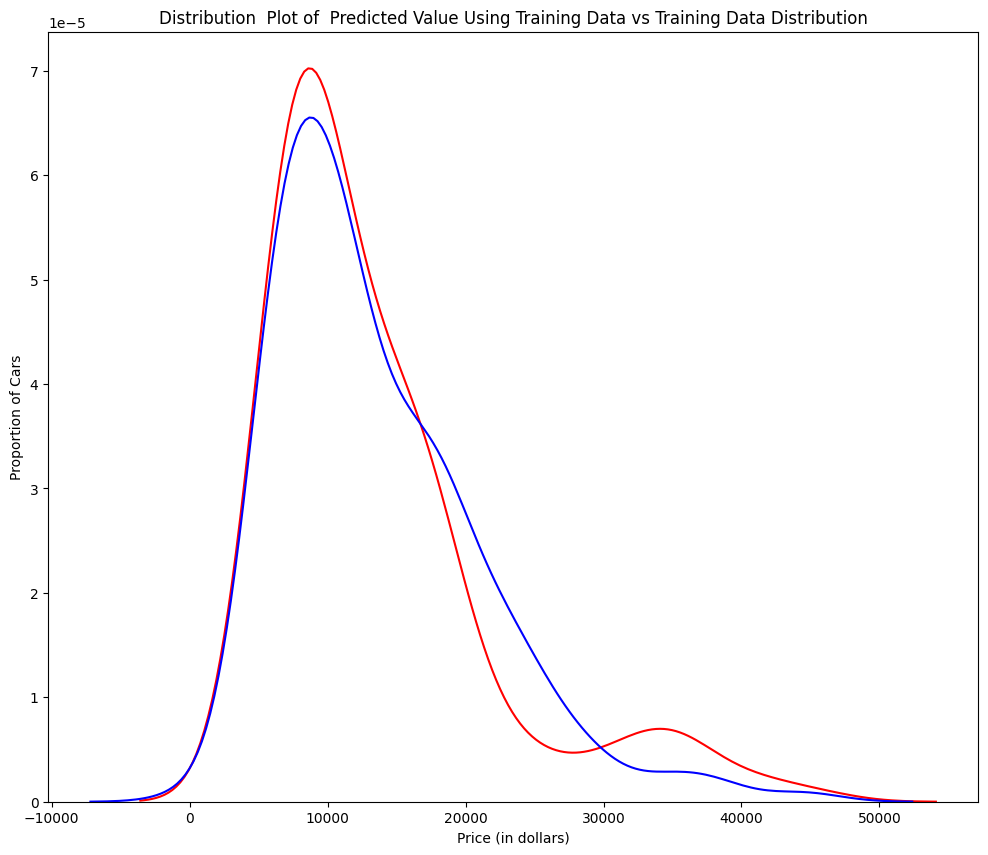

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    """
    Creates a distribution plot with two distributions.

    Args:
        RedFunction: Data for the first distribution (e.g., actual values).
        BlueFunction: Data for the second distribution (e.g., predicted values).
        RedName: Label for the first distribution.
        BlueName: Label for the second distribution.
        Title: Title of the plot.
    """
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-42-f0c964cf4e97>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-42-f0c964cf4e97>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

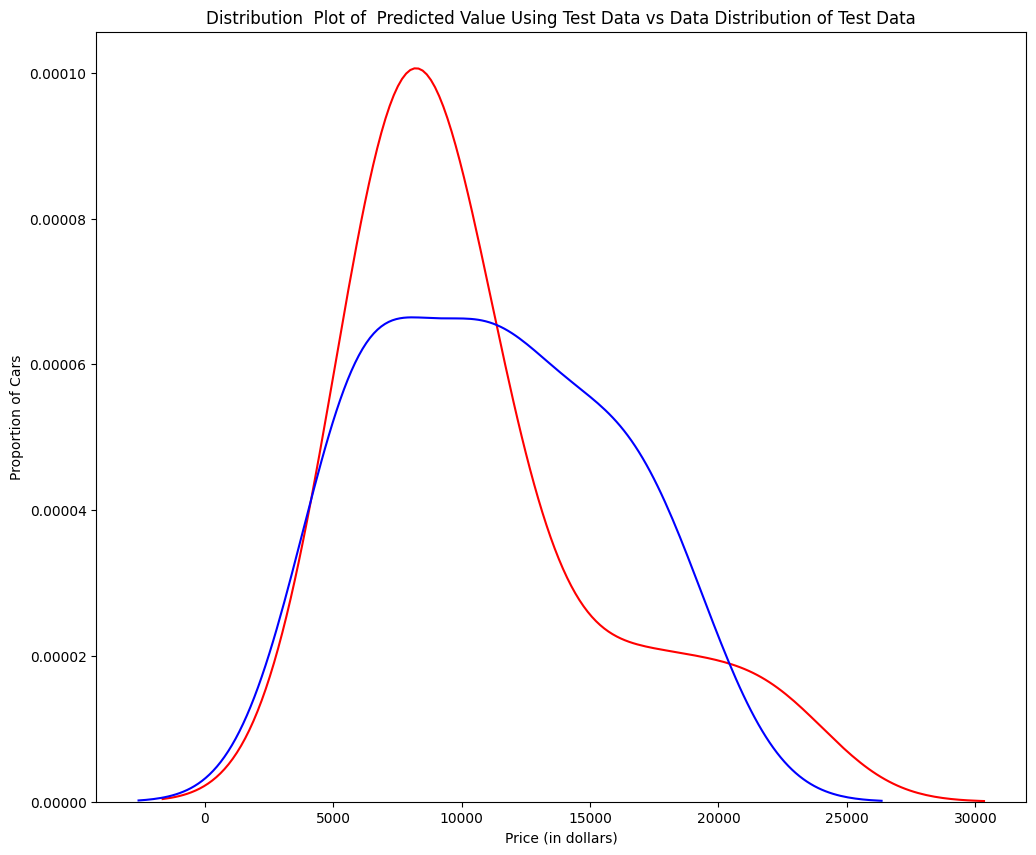

In [43]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [44]:
#try polynomial regression

from sklearn.preprocessing import PolynomialFeatures
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.45,random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [45]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)



LinearRegression()

In [46]:
y_hat = poly.predict(x_test_pr)
y_hat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    """
    Creates a scatter plot of the training and testing data, along with the polynomial regression curve.

    Args:
        xtrain: Training data for the x-axis.
        xtest: Testing data for the x-axis.
        y_train: Training data for the y-axis.
        y_test: Testing data for the y-axis.
        lr: The fitted linear regression model.
        poly_transform: The polynomial transformation object.
    """
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.xlabel('Horsepower')
    plt.legend()

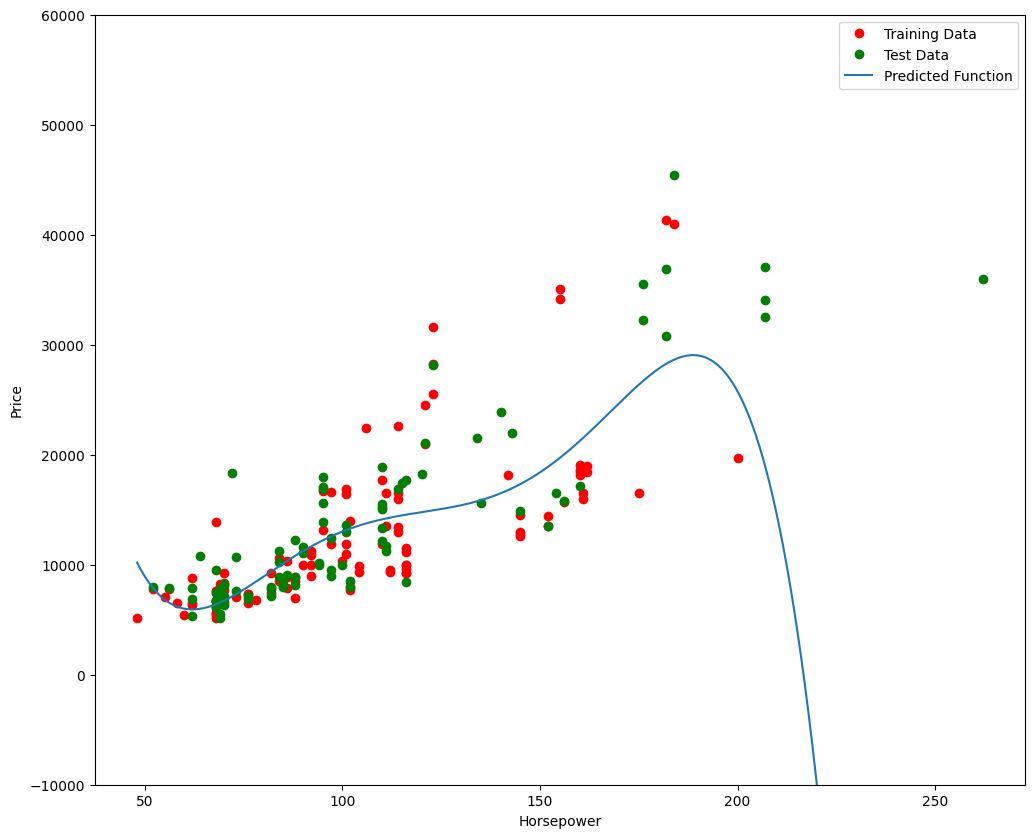

In [48]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

# here around 200 horsepower, the function begins to diverge from the data points.

In [49]:
poly.score(x_train_pr,y_train)

0.5567716902120254

In [50]:
poly.score(x_test_pr,y_test)

#indicates a worse model as r^2 value lowers

-29.871340302043684

Text(3, 0.75, 'Maximum R^2 ')

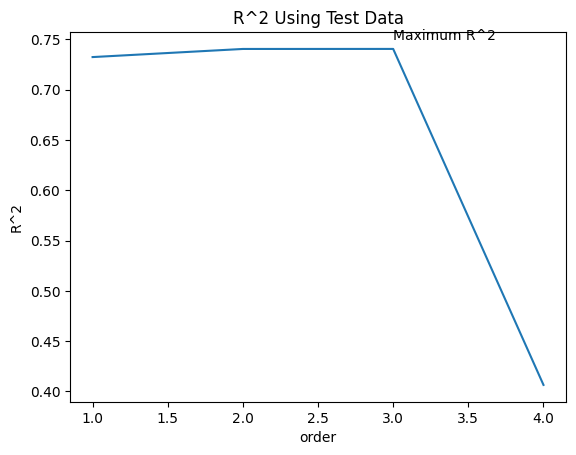

In [51]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

#the R^2 dramatically decreases at an order four polynomial.

In [52]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [59]:
#Ridge Regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

from sklearn.linear_model import Ridge

rm = Ridge(alpha = 10)
rm.fit(x_train_pr,y_train)

yhat = rm.predict(x_test_pr)

yhat[0:5]

rm.score(x_test_pr,y_test)



0.5418576440206506

In [63]:
#grid search -  find the best hyperparameter
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

rmm = Ridge()

gr = GridSearchCV(rmm, parameters1,cv=4)
gr.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

gr.best_estimator_.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)





0.8411649831036151